# Metody Obliczeniowe w Nauce i Technice

#### Laboratorium 1 
#### Arytmetyka komputerowa

#### Joanna Mikołajczyk

### Zadanie 1 Sumowanie liczb pojedynczej precyzji

1.1 Napisz program, który oblicza sumę N liczb pojedynczej precyzji 
przechowywanych w tablicy o N = 10^7 elementach. Tablica wypełniona 
jest tą samą wartością v z przedziału [0.1, 0.9] np. v = 0.53125.

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [3]:
def init_array(N, value): 
    return [value] * N

In [4]:
def sum(array):
    sum = np.float32(0.)
    for i in array:
        sum = sum + i
    return sum

In [4]:
# dane wejsciowe
N = 10000000
v = np.float32(0.53125)

In [5]:
a = init_array(N, v)

In [6]:
counted_sum = sum(a)
counted_sum

5030840.5

In [7]:
actual_sum = v * N
actual_sum

5312500.0

1.2. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny jest tak
duży?

Algorytm dodawania liczb zmiennoprzecinkowych ma wysoki błąd numeryczny wynikający z precyzji tych liczb. Podczas dodawania tracone są mniej znaczące bity, stąd obliczona suma jest mniejsza niż rzeczywista, a w rezultacie błąd względny duży.

In [8]:
def absolute_error(actual_value, measured_value):
    return m.fabs(actual_value - measured_value)

In [9]:
def relative_error(actual_value, measured_value):
    return m.fabs((actual_value - measured_value) / actual_value)

In [10]:
def to_percentage(number):
    return str(number * 100) + "%"

In [11]:
absolute_error(actual_sum, counted_sum)

281659.5

In [12]:
to_percentage(relative_error(actual_sum, counted_sum))

'5.301825882352941%'

1.3. W jaki sposób rośnie błąd względny w trakcie sumowania? Przedstaw wykres (raportuj
wartość błędu co 25000 kroków) i dokonaj jego interpretacji.

In [78]:
def relative_errors_by_step(array, step):
    X = list(range(0, len(array), step))
    Y = []
    for i in X:
        x = i + step
        counted_sum = sum(array[0:x])
        actual_sum = v * x
        Y.append(relative_error(actual_sum, counted_sum))
    return (X, Y)

In [79]:
(X, Y) = relative_errors_by_step(a, 25000)

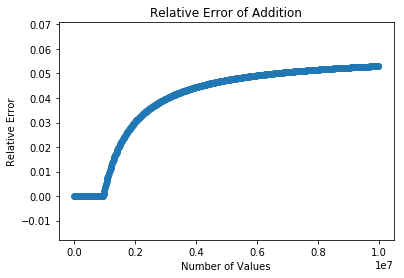

In [80]:
plt.scatter(X,Y)

plt.title('Relative Error of Addition')

plt.xlabel('Number of Values')
plt.ylabel('Relative Error')

plt.show()

Błąd względny w czasie sumowania n liczb zmiennoprzecinkowych rośnie proporcjonalnie do pierwiastka z n. Można to zaobserwować dopiero od pewnej wartości n, co wynika z precyzji liczb zmiennoprzecinkowych.

1.4. Zaimplementuj rekurencyjny algorytm sumowania, działający jak na rysunku poniżej.

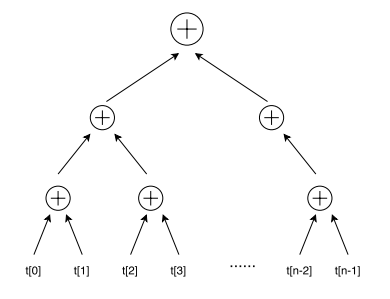

In [13]:
def sum_recursive(array):
    if (len(array) == 0):
        return 0
    elif (len(array) == 1):
        return array[0]
    else:
        mid = round(len(array)/2)
        return sum_recursive(array[0:mid]) + sum_recursive(array[mid:len(array)])

In [14]:
sum_recursive(a)

5312500.0

1.5. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny znacznie
zmalał?

In [91]:
def relative_errors_by_step_recursive(array, step):
    X = list(range(0, len(array), step))
    Y = []
    for i in X:
        x = i + step
        counted_sum = sum_recursive(array[0:x])
        actual_sum = v * x
        Y.append(relative_error(actual_sum, counted_sum))
    return (X, Y)

In [94]:
(X, Y) = relative_errors_by_step_recursive(a, 500000)

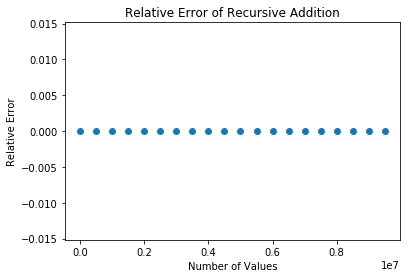

In [95]:
plt.scatter(X,Y)

plt.title('Relative Error of Recursive Addition')

plt.xlabel('Number of Values')
plt.ylabel('Relative Error')

plt.show()

Błąd względny przy przyjętych danych wejściowych wynosi 0 w każdej iteracji, natomiast co widać w następnym kroku, nie musi być równa 0. Dzieje się tak, ponieważ na każdym poziomie rekursji dodawane są liczby tego samego rzędu wielkości, dzięki czemu utrata bitów jest mała, a do pewnej wartości n żadna.

1.6. Porównaj czas działania obu algorytmów dla tych samych danych wejściowych.

In [5]:
# dane wejsciowe
N = 10000000
v = 0.53125

In [6]:
a = init_array(N, v)

In [17]:
import time

start = time.time()
sum(a)
end = time.time()

print(end - start)

1.2031619548797607


In [18]:
start = time.time()
sum_recursive(a)
end = time.time()

print(end - start)

12.369349002838135


Czas działania algorytmu rekurencyjnego jest 10 krotnie większy od czasu działania algorytmu iteracyjnego.

1.7. Przedstaw przykładowe dane wejściowe, dla których algorytm sumowania rekurencyjnego
zwraca niezerowy błąd.

In [19]:
# dane wejsciowe
N1 = 100000000
v1 = np.float32(0.99999)

In [20]:
a1 = init_array(N1, v1)

In [22]:
relative_error(v1 * N1, sum_recursive(a1))

6.642034283981306e-08

## Zadanie 2 Algorytm Kahana

Zaimplementuj algorytm sumowania Kahana.

float sum = 0.0f;

float err = 0.0f;

for (int i = 0; i < tab.length; ++i) {

    float y = tab[i] - err;
    
    float temp = sum + y;
    
    err = (temp - sum) - y;
    
    sum = temp;

}

In [23]:
def kahan_sum(array):
    sum = np.float32(0.)
    err = np.float32(0.)
    
    for i in range(0,len(array)):
        y = array[i] - err
        tmp = sum + y
        err = (tmp - sum) - y
        sum = tmp
        
    return sum

2.1. Wyznacz bezwzględny i względny błąd obliczeń dla tych samych danych wejściowych
jak w przypadku testów z Zadania 1.

In [24]:
# dane wejsciowe
N = 10000000
v = 0.53125

In [25]:
a = init_array(N, v)

In [26]:
k_sum = kahan_sum(a)
k_sum

5312500.0

In [27]:
actual_sum = v * N
actual_sum

5312500.0

In [28]:
absolute_error(actual_sum, k_sum)

0.0

In [30]:
relative_error(actual_sum, k_sum)

0.0

2.2. Wyjaśnij dlaczego w algorytm Kahana ma znacznie lepsze własności numeryczne?
Do czego służy zmienna err?

Zmienna err przechowuje utracone przy dodawaniu liczb znacznie różniących się rzędem wielkości niskie bity. Akumulowanie utraconych bitówy w zmiennej err pozwala na ich odzyskanie w kolejnej iteracji poprzez dodanie do y. W dużym stopniu niweluje to problem, który powstaje przez ograniczenie precyzji liczb zmiennoprzecinkowych.

2.3. Porównaj czasy działania algorytmu Kahana oraz algorytmu sumowania rekurencyjnego
dla tych samych danych wejściowych.

In [7]:
# dane wejsciowe
N = 10000000
v = 0.41293

In [8]:
a = init_array(N, v)

In [33]:
start = time.time()
kahan_sum(a)
end = time.time()

print(end - start)

3.043694257736206


In [34]:
start = time.time()
sum_recursive(a)
end = time.time()

print(end - start)

12.21823763847351


In [13]:
start = time.time()
sum(a)
end = time.time()

print(end - start)

1.2788946628570557


Czas działania algorytmu Kahana jest 4 krotnie mniejszy od czasu działania algorytmu rekurencyjnego, i jedynie 2.3 krotnie większy od czasu działania algorytmu iteracyjnego.

## Zadanie 3 Sumy częściowe

Rozważ sumy częściowe szeregu definiującego funkcję dzeta Riemanna oraz funkcję eta Dirichleta:

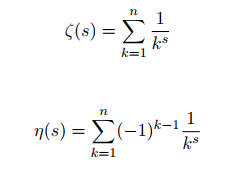

Dla s = 2, 3.6667, 5, 7.2, 10 oraz n = 50, 100, 200, 500, 1000 oblicz wartości funkcji ζ(s)
i η(s) w pojedynczej precyzji sumując w przód, a następnie wstecz. Porównaj wyniki
z rezultatami uzyskanymi dla podwójnej precyzji. Dokonaj interpretacji otrzymanych
wyników.

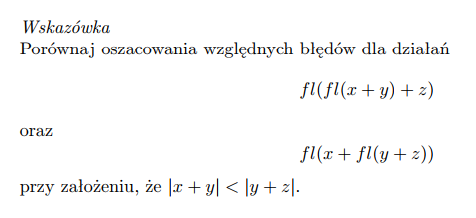

In [12]:
def dirichlet(n, s, data_type = np.float32):
    sum = data_type(0)
    for k in range(1, n+1):
        sum = sum + data_type(m.pow(-1, k-1) * m.pow(k, -s))
    return sum

In [13]:
def dirichlet_back(n, s, data_type = np.float32):
    s = data_type(s)
    sum = data_type(0.) 
    for k in range(n, 0, -1):
        sum = sum + data_type(m.pow(-1, k-1) * m.pow(k, -s))
    return sum

In [14]:
def riemann(n, s, data_type = np.float32):
    sum = data_type(0)
    for k in range(1, n + 1):
        sum = sum + data_type(m.pow(k, -s))
    return sum

In [11]:
def riemann_back(n, s, data_type = np.float32):
    sum = data_type(0)
    for k in range(n, 0, -1):
        sum = sum + data_type(m.pow(k, -s))
    return sum

In [9]:
s_values = [2, 3.6667, 5, 7.2, 10]
n_values = [50, 100, 200, 500, 1000]

In [16]:
def plot_dirichlet_result(s, n):
    dir_32, dir_32_back = [], []
    dir_64, dir_64_back = [], []
    
    for i in range(0, len(n)):    
        dir_32.append(dirichlet(n[i], s))
        dir_32_back.append(dirichlet_back(n[i], s))
        dir_64.append(dirichlet(n[i], s, np.float64))
        dir_64_back.append(dirichlet_back(n[i], s, np.float64))
        
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title('Dirichlet Comparision - Forward vs Backward Summation', fontsize = 15)
    ax.plot(n, dir_32, 'o', color = 'green', markersize = 15)
    ax.plot(n, dir_32_back, '*', color = 'yellow', markersize = 10)
    
    for i, j, k in zip(n, dir_32, dir_32_back):
        ax.annotate('    Forward:   %1.12f\n    Backward: %1.12f' % (j, k), xy = (i, j), fontsize = 15)
        
    plt.show()
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title('Dirichlet Comparision - Single vs Double Precision', fontsize = 15)
    ax.plot(n, dir_32, 'o', color = 'blue', markersize = 15)
    ax.plot(n, dir_64, '*', color = 'yellow', markersize = 10)
    
    for i, j, k in zip(n, dir_32, dir_64):
        ax.annotate('    Single:  %1.12f\n    Double: %1.12f' % (j, k), xy = (i, j), fontsize = 15)
        
    plt.show()

In [17]:
def plot_riemann_result(s, n):
    rie_32, rie_32_back = [], []
    rie_64, rie_64_back = [], []
    
    for i in range(0, len(n)): 
        rie_32.append(riemann(n[i], s))
        rie_32_back.append(riemann_back(n[i], s))
        rie_64.append(riemann(n[i], s, np.float64))
        rie_64_back.append(riemann_back(n[i], s, np.float64))
        
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title('Riemann Comparision - Forward vs Backward Summation', fontsize = 15)
    ax.plot(n, rie_32, 'o', color = 'green', markersize = 15)
    ax.plot(n, rie_32_back, '*', color = 'yellow', markersize = 10)
    
    for i, j, k in zip(n, rie_32, rie_32_back):
        ax.annotate('    Forward:   %1.12f\n    Backward: %1.12f' % (j, k), xy = (i, j), fontsize = 15)
        
    plt.show()
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title('Riemann Comparision - Single vs Double Precision', fontsize = 15)
    ax.plot(n, rie_32, 'o', color = 'blue', markersize = 15)
    ax.plot(n, rie_64, '*', color = 'yellow', markersize = 10)
    
    for i, j, k in zip(n, rie_32, rie_64):
        ax.annotate('    Single:  %1.12f\n    Double: %1.12f' % (j, k), xy = (i, j), fontsize = 15)
        
    plt.show()  

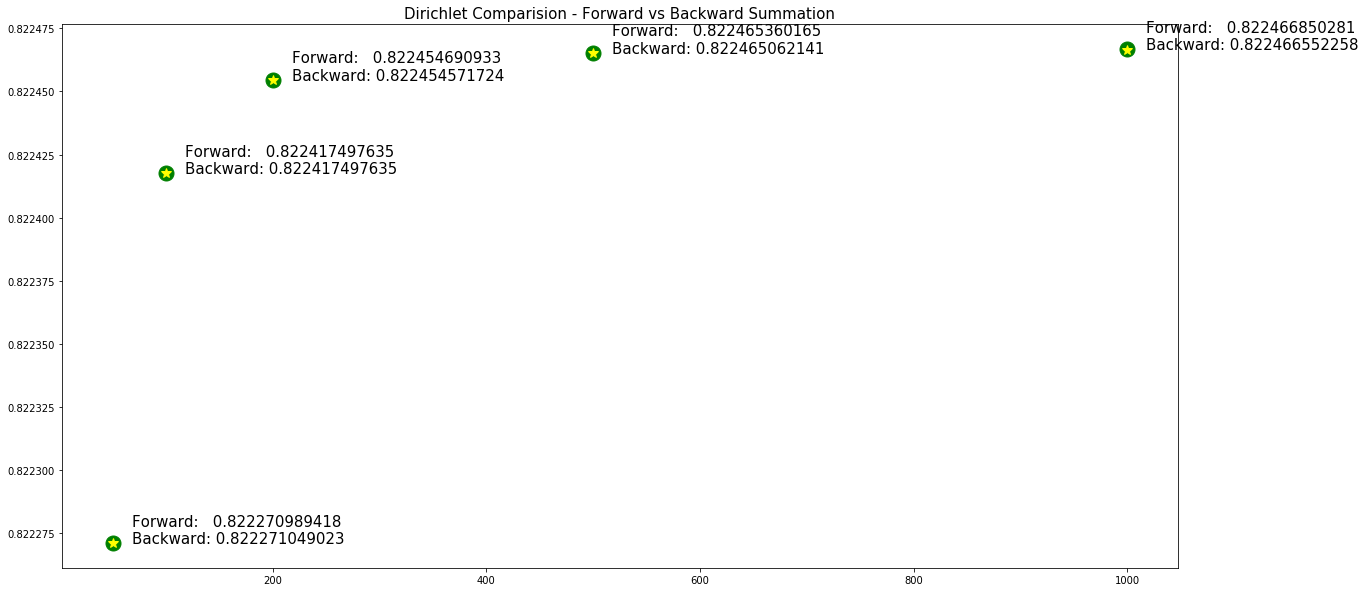

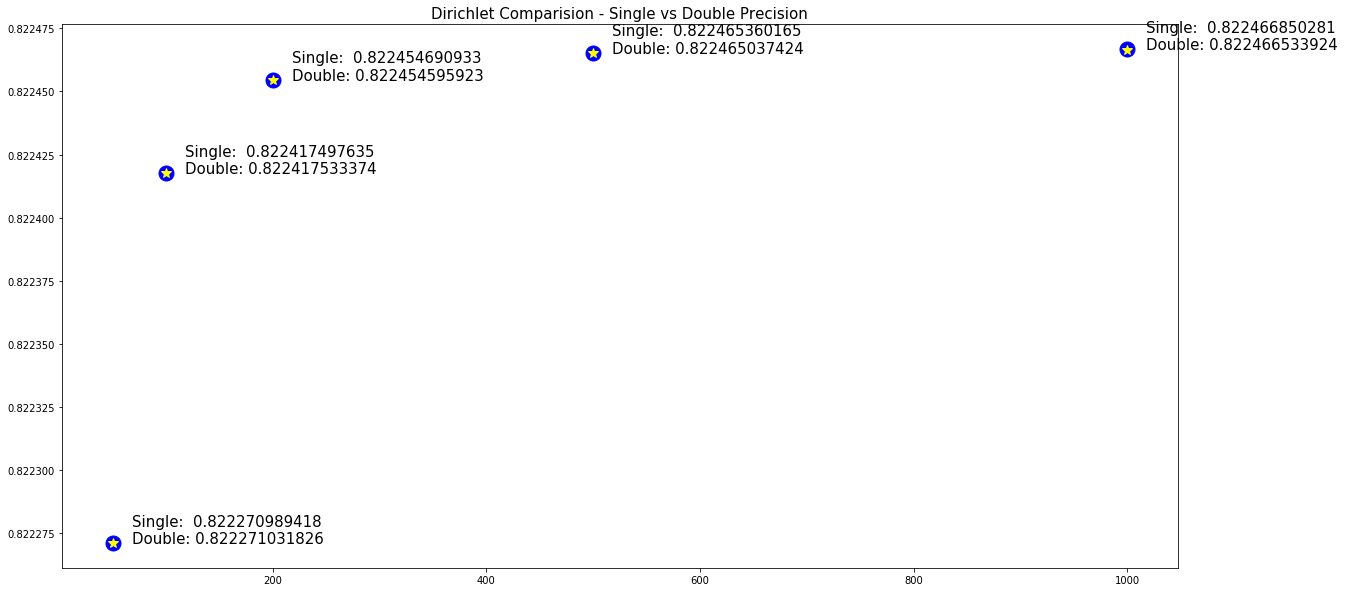

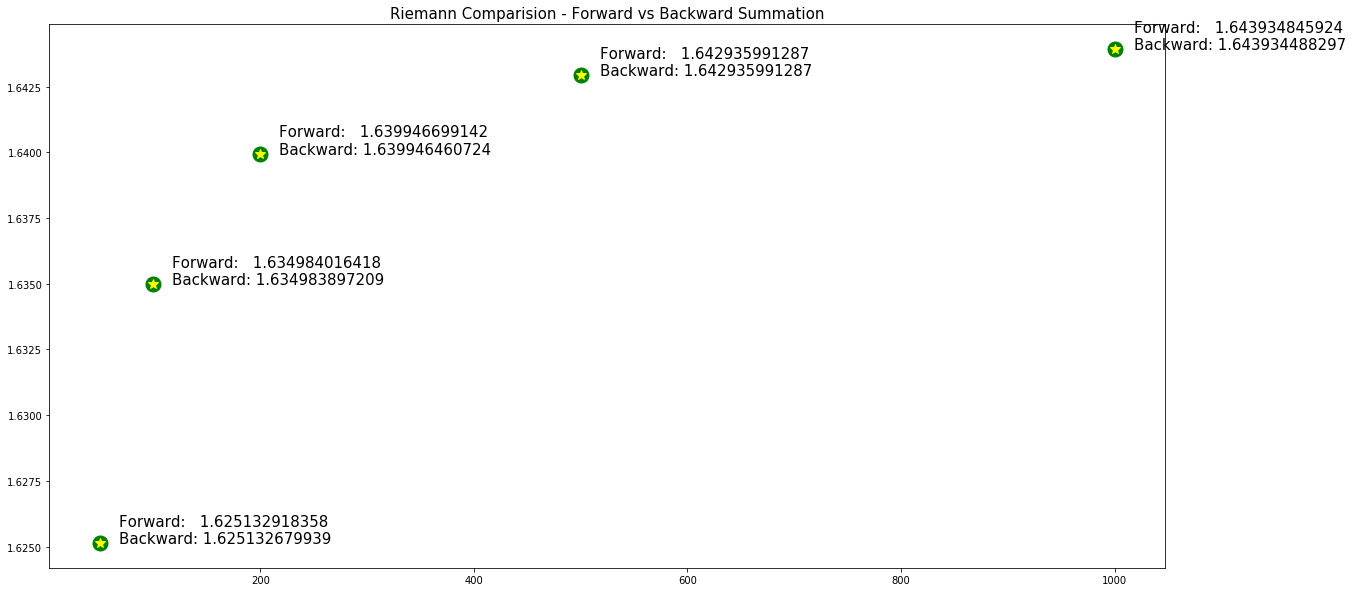

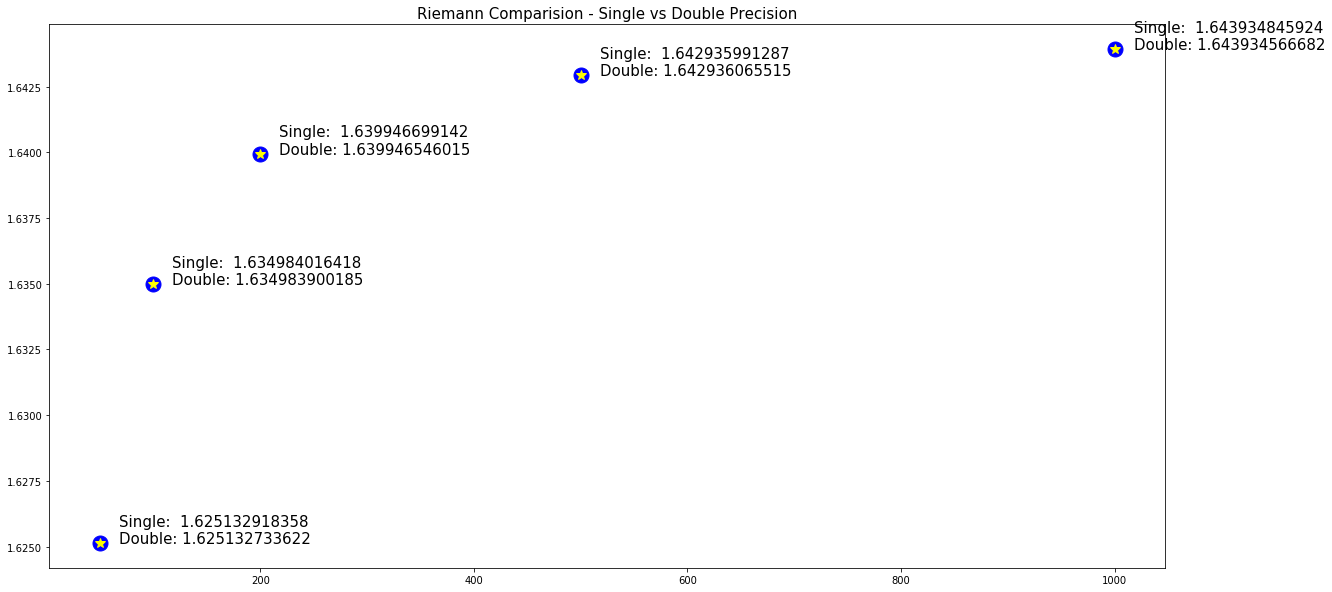

In [18]:
plot_dirichlet_result(2, n_values)
plot_riemann_result(2, n_values)

Przy s = 2 wartości nie różnią się znacząco, co można zauważyć na powyższych wykresach. W sumowaniu wstecz otrzymujemy wyższy wynik niż w sumowaniu w przód, natomiast wyniki dla podwójnej precyzji są niższe niż dla pojedynczej preczyji.

In [213]:
def print_dirichlet_result(s, n):
    for i in range(0, len(n)):   
        print('Dirichlet - s = %1.6f, n = %1f\n' % (s,n[i]))
        print('Single precision | Forward:  %1.12f' % dirichlet(n[i], s))
        print('Single precision | Backward: %1.12f' % dirichlet_back(n[i], s))
        print('Double precision | Forward:  %1.12f' % dirichlet(n[i], s, np.float64))
        print('Double precision | Backward: %1.12f\n' % dirichlet_back(n[i], s, np.float64))

In [216]:
def print_riemann_result(s, n):
    for i in range(0, len(n)):  
        print('Riemann - s = %1.6f, n = %1f\n' % (s,n[i]))
        print('Single precision | Forward:  %1.12f' % riemann(n[i], s))
        print('Single precision | Backward: %1.12f' % riemann_back(n[i], s))
        print('Double precision | Forward:  %1.12f' % riemann(n[i], s, np.float64))
        print('Double precision | Backward: %1.12f\n' % riemann_back(n[i], s, np.float64))

In [217]:
for s in s_values:
    print_dirichlet_result(s, n_values)
for s in s_values:
    print_riemann_result(s, n_values)

Dirichlet - s = 2.000000, n = 50.000000

Single precision | Forward:  0.822270989418
Single precision | Backward: 0.822271049023
Double precision | Forward:  0.822271031826
Double precision | Backward: 0.822271031826

Dirichlet - s = 2.000000, n = 100.000000

Single precision | Forward:  0.822417497635
Single precision | Backward: 0.822417497635
Double precision | Forward:  0.822417533374
Double precision | Backward: 0.822417533374

Dirichlet - s = 2.000000, n = 200.000000

Single precision | Forward:  0.822454690933
Single precision | Backward: 0.822454571724
Double precision | Forward:  0.822454595923
Double precision | Backward: 0.822454595923

Dirichlet - s = 2.000000, n = 500.000000

Single precision | Forward:  0.822465360165
Single precision | Backward: 0.822465062141
Double precision | Forward:  0.822465037424
Double precision | Backward: 0.822465037424

Dirichlet - s = 2.000000, n = 1000.000000

Single precision | Forward:  0.822466850281
Single precision | Backward: 0.8224665

Różnice wynikają z propogacji błędu operacji dodawania, a także są zależne od precyzji.

## Zadanie 4 Błędy zaokrągleń i odwzorowanie logistyczne

Rozważ odwzorowanie logistyczne dane następującym wzorem rekurencyjnym
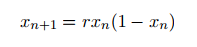
Przy czym 0 <= xn <= 1 i r > 0. Zbadaj zbieżność procesu iteracyjnego określonego tym
równaniem w zależności od wartości parametru r oraz x0.

In [19]:
def logistic_map(n, r, x0 = 0, data_type = np.float32):
    result = np.zeros(n, dtype = data_type)
    result[0] = x0
    for i in range(1, n):
        result[i] = r * result[i-1] * (1 - result[i-1])
    return result

a) Dla różnych wartości r (1 <= r <= 4) oraz kilku wybranych wartości x0 przedstaw
na wykresie wartości xn uzyskane po wielu iteracjach odwzorowania logistycznego
(diagram bifurkacyjny). Dokonaj interpretacji otrzymanych wyników.

In [41]:
def plot_logistic_map(r_min, r_max, num_r, x0, data_type = np.float32):
    X = []
    Y = []
    rates = np.linspace(r_min, r_max, num_r)
    for r in rates:
        values = logistic_map(num_r, r, x0, data_type)
        values = values[num_r-100:]
        for v in values:
            X.append(r)
            Y.append(v)

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title('Logistic map')
    ax.plot(X, Y, '.', markersize = 1)
    plt.show()

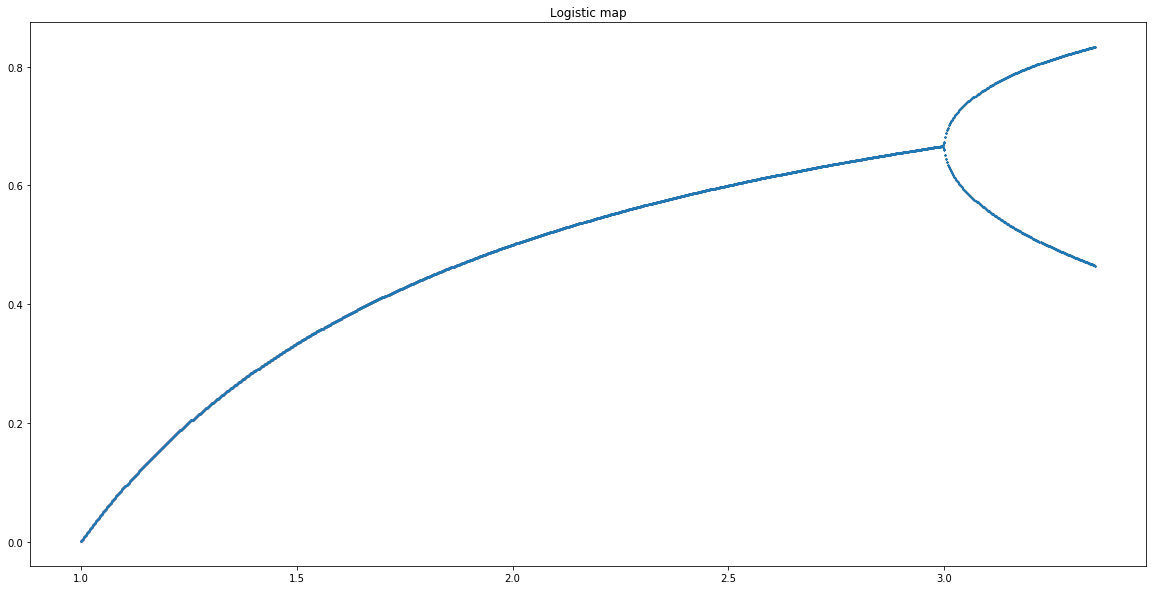

In [42]:
plot_logistic_map(1,3.35,1000,0.01)

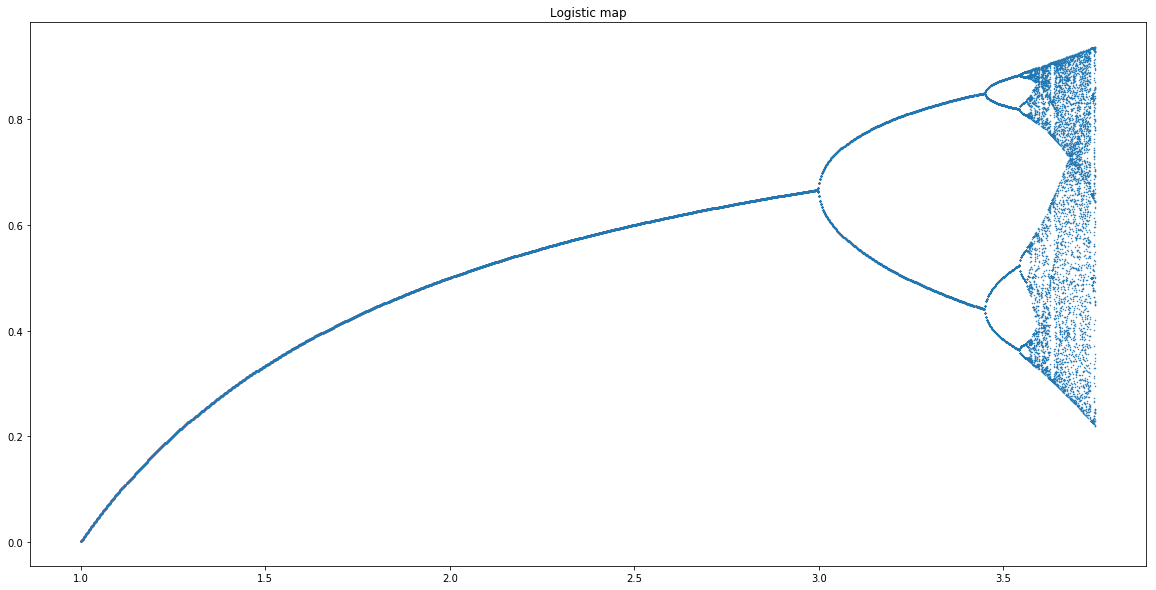

In [43]:
plot_logistic_map(1,3.75,1000,0.05)

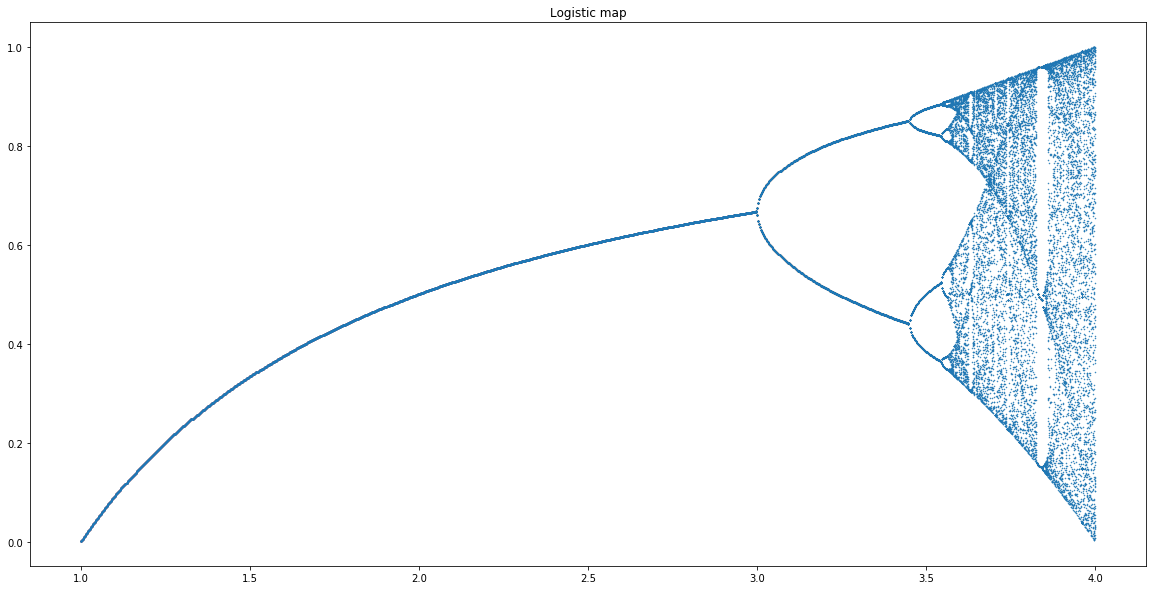

In [44]:
plot_logistic_map(1,4,1000,0.9)

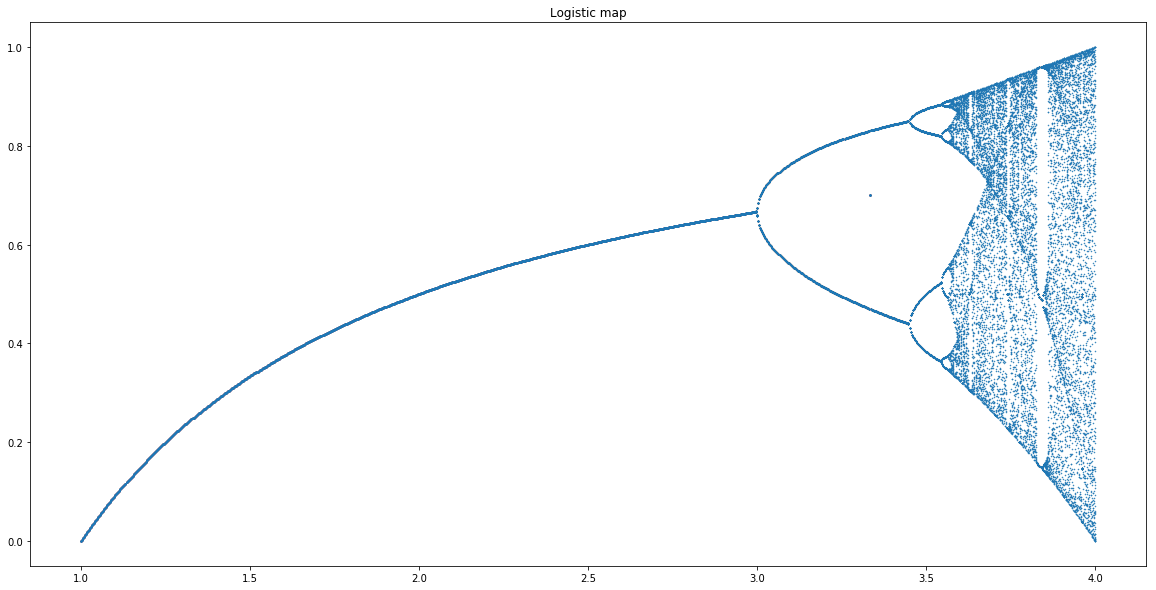

In [45]:
plot_logistic_map(1,4,1000,0.1)

Przy nawet drobnej zmianie parametru r zmienia się kształt wykresu, wykres przyjmuje postać fraktalu, w przedziale (3,4) można to zaobserwować. Z kolei wartość parametru początkowego x0 zdaje się nie mieć wpływu na postać wykresu. Pojawia się tu zjawisko bifurkacji - zmiana parametru skutkuje skokową zmianą własności modelu matematycznego.

b) Dla tych samych wartości x0 oraz r (3.75 <= r <= 3.8) porównaj trajektorie obliczone
z użyciem pojedynczej i podwójnej precyzji. Wyjaśnij otrzymane wyniki.

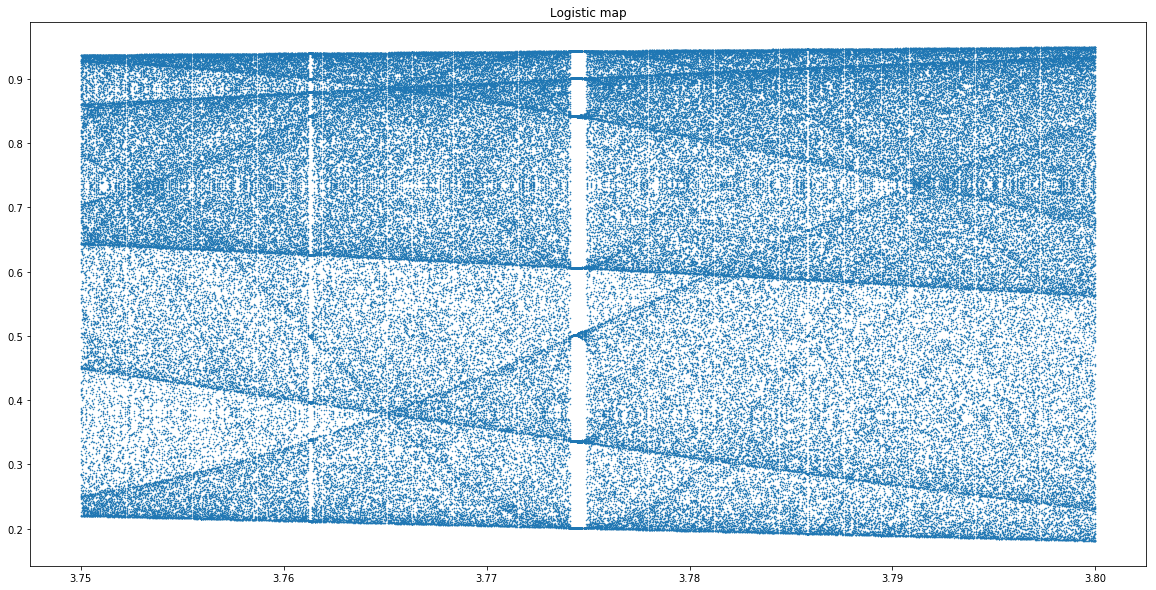

In [40]:
plot_logistic_map(3.75, 3.8, 1000, 0.5, np.float32)

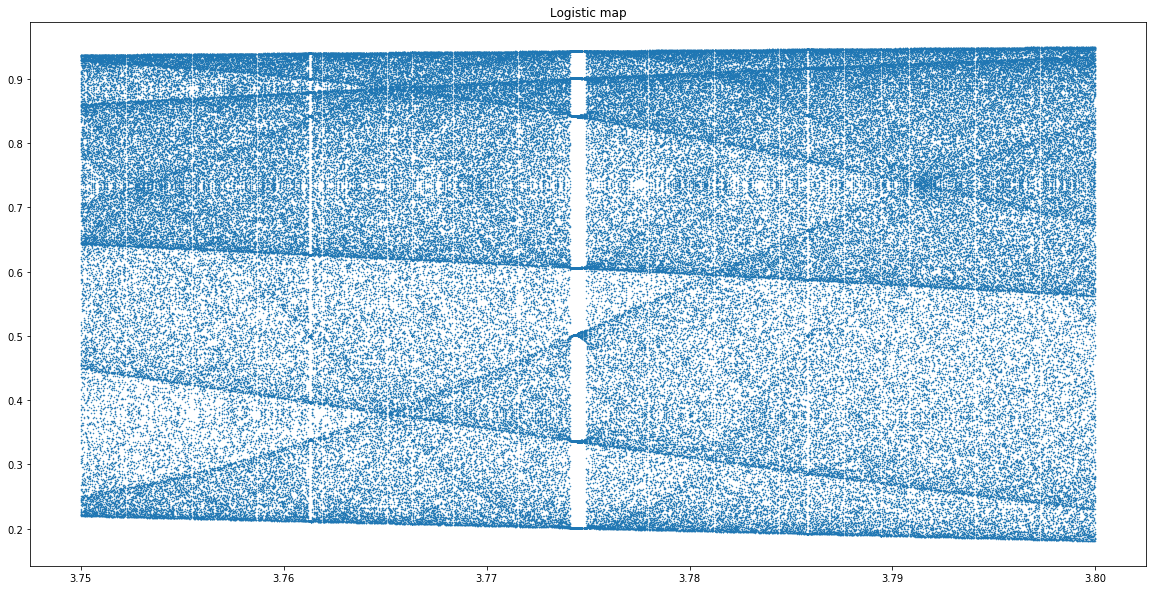

In [39]:
plot_logistic_map(3.75, 3.8, 1000, 0.5, np.float64)

Wykresy nie różnią się kształtem, jednak ich gęstość jest inna, przy podwójnej precyzji jest ona większa.

c) Dla r = 4 i różnych wartości x0 wyznacz (pojedyncza precyzja) liczbę iteracji
potrzebnych do osiągnięcia zera. Przedstaw interpretację rezultatów.

In [257]:
def zero_logistic_map(x0 = 0, r = 4, data_type = np.float32):
    result = [x0]
    i = 0
    while (np.isclose(result[i],0) == False):
        result.append(r * result[i-1] * (1 - result[i-1]))
        i = i + 1
    return i

In [263]:
x0 = np.linspace(0.0, 1.0, num = 20)

In [264]:
x0

array([ 0.        ,  0.05263158,  0.10526316,  0.15789474,  0.21052632,
        0.26315789,  0.31578947,  0.36842105,  0.42105263,  0.47368421,
        0.52631579,  0.57894737,  0.63157895,  0.68421053,  0.73684211,
        0.78947368,  0.84210526,  0.89473684,  0.94736842,  1.        ])

In [265]:
iterations = []
for x in x0:
    iterations.append(zero_logistic_map(x))

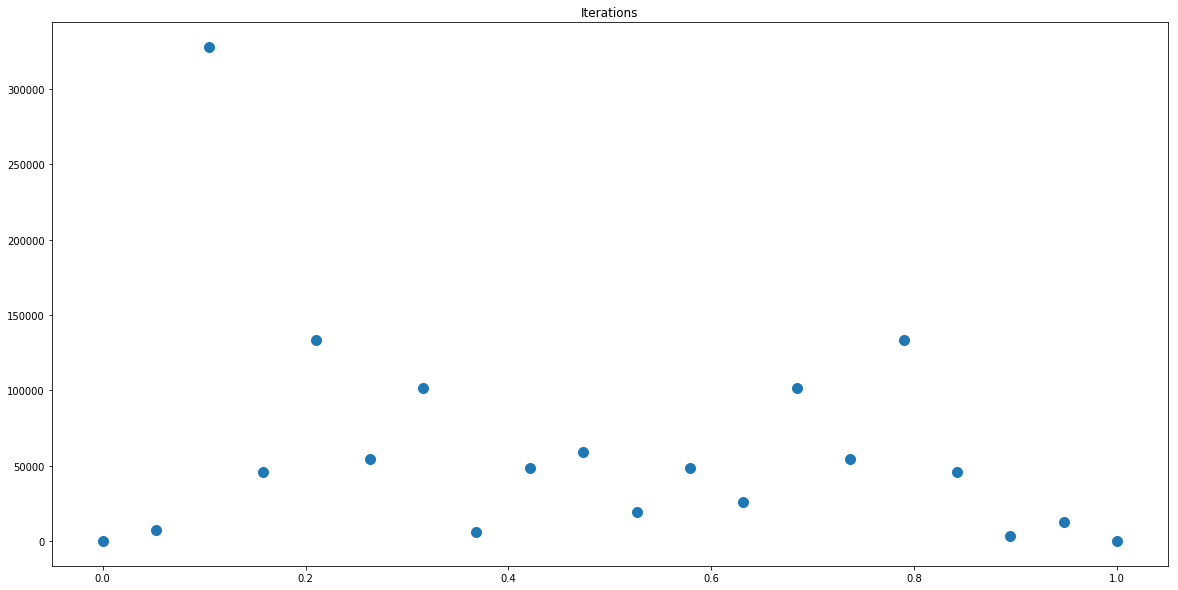

In [267]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Iterations')
ax.plot(x0, iterations, 'o', markersize = 10)
plt.show()

In [269]:
x0 = np.linspace(0.0, 1.0, num = 100)
x0

array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
        0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
        0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
        0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
        0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
        0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
        0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
        0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
        0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
        0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
        0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
        0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
        0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
        0.65656566,  0.66666667,  0.67676768,  0.68686869,  0.69

In [270]:
iterations = []
for x in x0:
    iterations.append(zero_logistic_map(x))

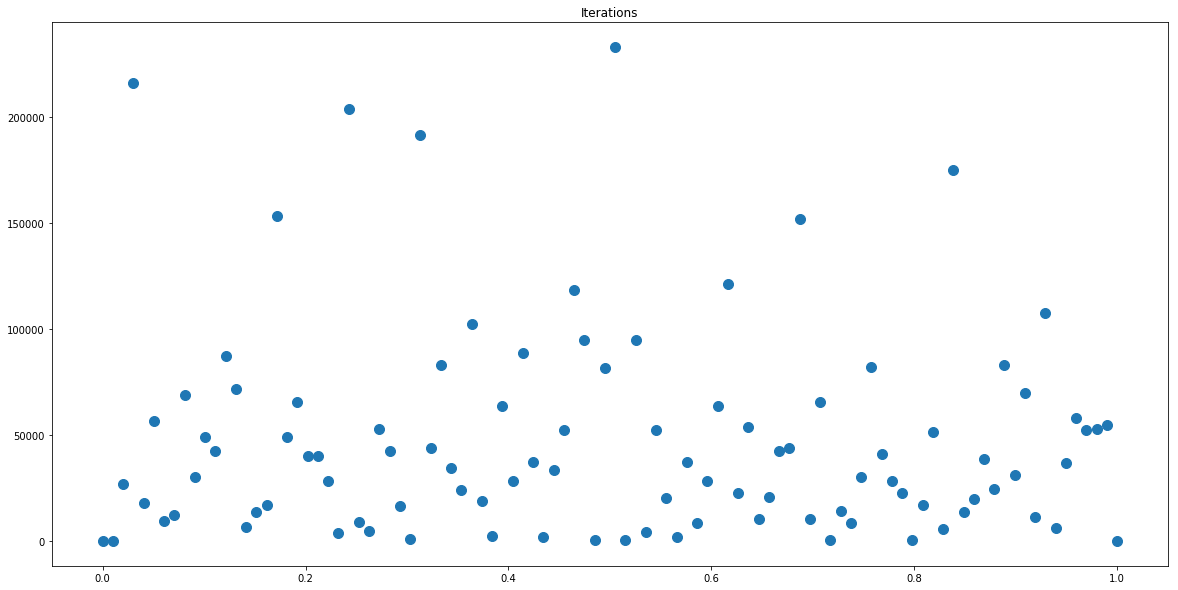

In [271]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Iterations')
ax.plot(x0, iterations, 'o', markersize = 10)
plt.show()

Ilość iteracji wydaje się być niezależna od wartości x0.